<a href="https://colab.research.google.com/github/ratyagi/KaggleX-Used-Car-Prediction-Model/blob/main/KaggleX_Skill_Assessment_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> KaggleX Skill Assessment Challenge </h1>
<h3 align="center"> Machine Learning for Used Car Price Prediction </h3>
<div style="text-align: center;"> <i> Submission by: Rashi Tyagi </i>

## Overview

Machine Learning is widely used in various industries worldwide, and the automobile and consultancy business is no exception. As a component of the KaggleX application, participate in this challenge by predicting the price of a used vehicle. As cars age and resold, their value is affected by supply and demand, as well as their specific set of features. This study aims to demonstrate how Machine Learning algorithms can better utilize data on less common features to assess the value of used cars.


## Objective

**My Goal**: *Predict the price of a used vehicle.* Through this project I will compare the performance of various Machine Learning algorithms in predicting the price of used cars. The algorithms under consideration are:

- Linear Regression
- Ridge Regression
- Lasso Regression
- Support Vector Regression
- Decision Tree Regression
- KNeighborsRegressor
- CatBoostRegressor
- Random Forest Regression

### **importing libraries**

In [ ]:
import numpy as np  #importing numpy
import pandas as pd     #importing pandas
import matplotlib.pyplot as plt  #importing matplotlib.pyplot
import seaborn as sns   #importing seaborn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
import re
from sklearn.impute import SimpleImputer

### **Loading dataset**

In [ ]:
data=pd.read_csv("train.csv")

In [ ]:
print("shape of data is: ",data.shape)

shape of data is:  (54273, 13)


In [ ]:
data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


### **Data cleaning**

In [ ]:
data.drop(["id"],axis=1,inplace=True) #Removing carID from dataset as it is not important for analysis.

### **Exploratory data analysis**

In [ ]:
data.head()
data.isnull().sum()
data.info() #Information of data
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         54273 non-null  object
 1   model         54273 non-null  object
 2   model_year    54273 non-null  int64 
 3   milage        54273 non-null  int64 
 4   fuel_type     54273 non-null  object
 5   engine        54273 non-null  object
 6   transmission  54273 non-null  object
 7   ext_col       54273 non-null  object
 8   int_col       54273 non-null  object
 9   accident      54273 non-null  object
 10  clean_title   54273 non-null  object
 11  price         54273 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 5.0+ MB


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850
...,...,...,...,...,...,...,...,...,...,...,...,...
54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000
54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500
54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950
54271,Porsche,911 Carrera 4 GTS,2023,1518,Gasoline,4.0L H6 24V GDI DOHC,8-Speed Automatic with Auto-Shift,Beige,Brown,None reported,Yes,194965


 **Observations** : The dataset has 54273 rows and 12 columns. There are no null values. 3 columns have 'int' as datatype and other 'string'.  

In [ ]:
data.columns # Column names


Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

### **Continuous and categorical distribution**

In [ ]:
categorical_col,continuous_col=[],[]      #list for categorical and continuous column
def categorical_continuous_col(data):     #declaring a function
    for col in data.columns:              #for loop to check column type
        if data.dtypes[col]=="object":
            categorical_col.append(col)   #appending categorical col
        else:
            continuous_col.append(col)    #appending continuous columns
    return categorical_col,continuous_col


In [ ]:
categorical_col,continuous_col=categorical_continuous_col(data)

In [ ]:
#categorical columns
categorical_col

['brand',
 'model',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title']

In [ ]:
#continuous columns
continuous_col

['model_year', 'milage', 'price']

### **Univariate analysis on Continuous column**

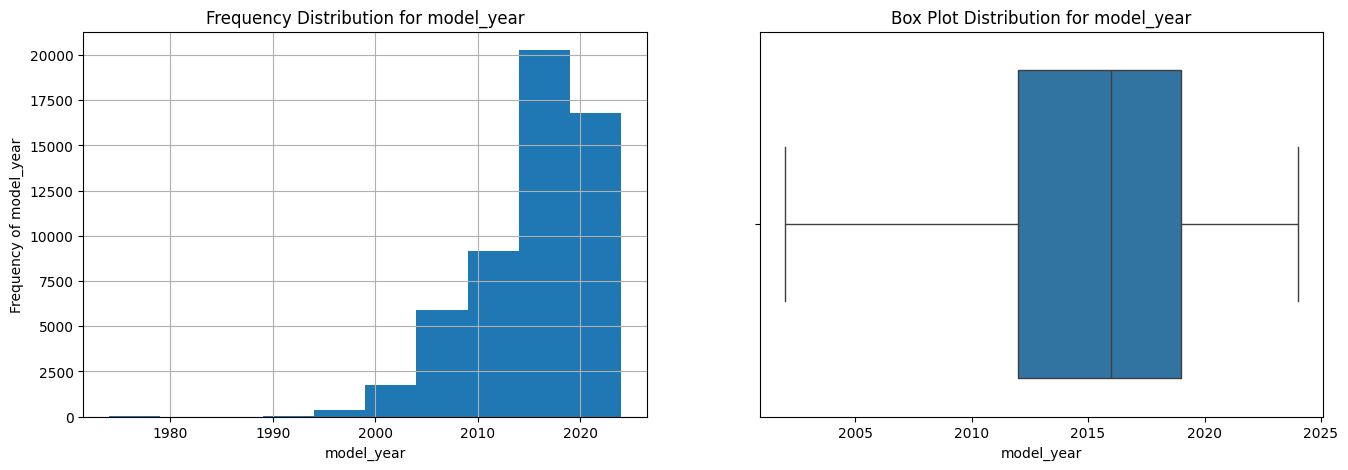

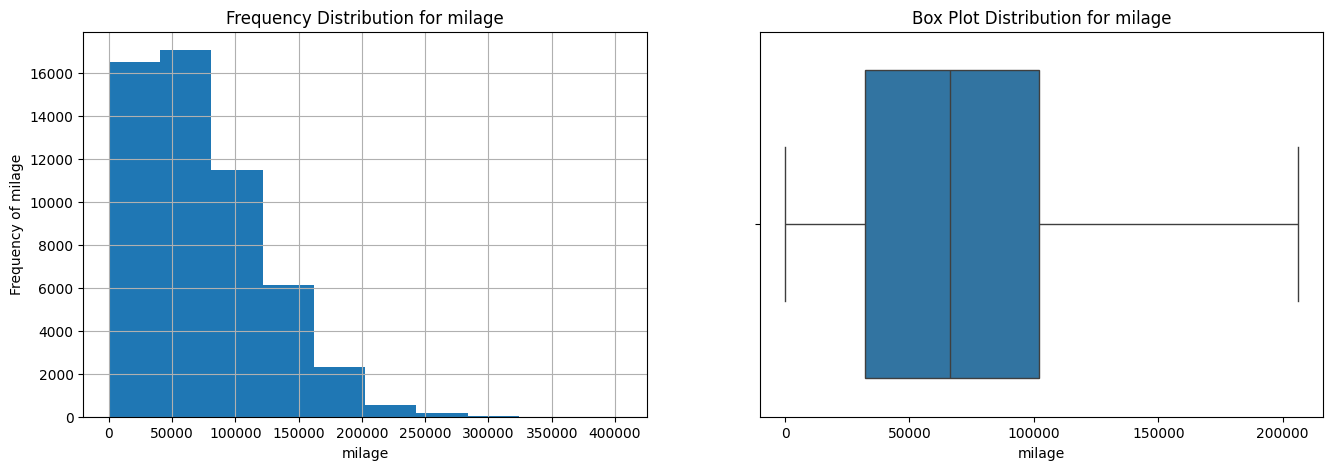

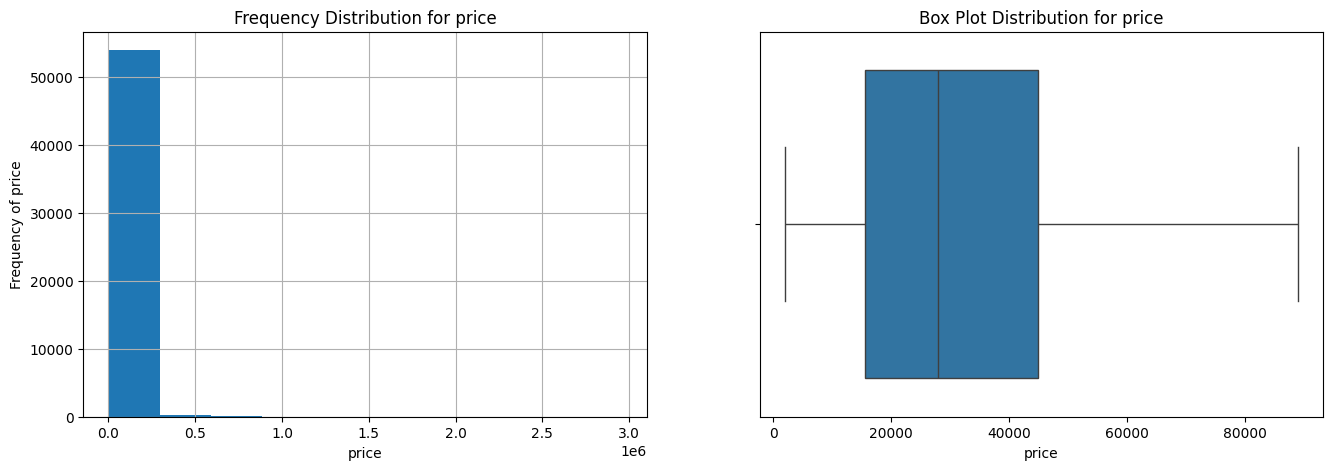

In [ ]:
for col in continuous_col:
    plt.figure(figsize = [16,5])    #figure size
    plt.subplot(1,2,1)  #subplot 1
    # Plotting the freq distibution for 'col'
    plt.hist(data[col])
    # To bring the grid structure out of the data
    plt.grid();
    # Label the x axis
    plt.xlabel(col)
    # Label the y axis
    plt.ylabel("Frequency of {}".format(col))
    # Giving a title on the top
    plt.title("Frequency Distribution for {}".format(col))
    plt.subplot(1,2,2)
    sns.boxplot(data = data, x =col, showfliers=False)
    plt.title("Box Plot Distribution for {}".format(col))
    # to remove the array data
    plt.show();

Add observations here for above


### **categorical column**

In [ ]:
#To check values in each categorical column
for col in categorical_col:
 print("*"*50)
 print("value counts for {} is ".format(col))
 print(data[col].value_counts())

**************************************************
value counts for brand is 
brand
BMW              7369
Ford             6706
Mercedes-Benz    5087
Chevrolet        4424
Audi             2922
Porsche          2627
Toyota           2315
Lexus            2257
Jeep             2247
Land             1995
Cadillac         1565
Nissan           1252
GMC              1076
Dodge            1011
RAM               966
INFINITI          957
Lincoln           767
Mazda             748
Subaru            739
Hyundai           694
Jaguar            661
Volkswagen        628
Honda             624
Acura             580
Kia               526
Volvo             452
MINI              364
Maserati          293
Bentley           284
Chrysler          258
Genesis           249
Buick             228
Mitsubishi        182
Hummer            176
Pontiac           149
Alfa              144
Rolls-Royce       142
Lamborghini       122
Tesla             110
Ferrari            87
Saturn             58
Scion         

In [ ]:
#cateogorical columns
categorical_col

['brand',
 'model',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title']

In [ ]:
#after remove model from categorical column to better visualisation
categorical_col_1=['brand', 'transmission', 'fuel_type', 'ext_col']

### **Univariate analysis for categorical columns**
- using pie chart and countplot

**************************************************
distributions for category brand is 
 brand
BMW              7369
Ford             6706
Mercedes-Benz    5087
Chevrolet        4424
Audi             2922
Porsche          2627
Toyota           2315
Lexus            2257
Jeep             2247
Land             1995
Cadillac         1565
Nissan           1252
GMC              1076
Dodge            1011
RAM               966
INFINITI          957
Lincoln           767
Mazda             748
Subaru            739
Hyundai           694
Jaguar            661
Volkswagen        628
Honda             624
Acura             580
Kia               526
Volvo             452
MINI              364
Maserati          293
Bentley           284
Chrysler          258
Genesis           249
Buick             228
Mitsubishi        182
Hummer            176
Pontiac           149
Alfa              144
Rolls-Royce       142
Lamborghini       122
Tesla             110
Ferrari            87
Saturn             58
Sci

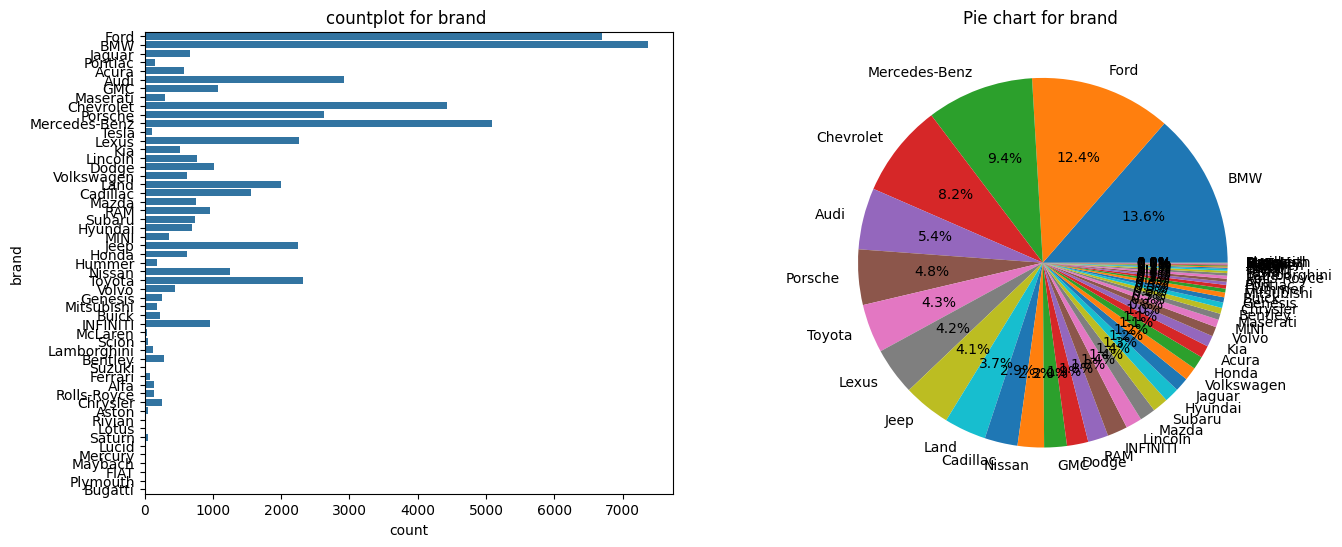

**************************************************
distributions for category transmission is 
 transmission
A/T                                                   16757
8-Speed A/T                                            7287
Transmission w/Dual Shift Mode                         6454
6-Speed A/T                                            5944
6-Speed M/T                                            3618
7-Speed A/T                                            3415
10-Speed A/T                                           2187
8-Speed Automatic                                      1189
5-Speed A/T                                            1185
9-Speed A/T                                            1073
4-Speed A/T                                             764
5-Speed M/T                                             718
CVT Transmission                                        692
10-Speed Automatic                                      642
6-Speed Automatic                                  

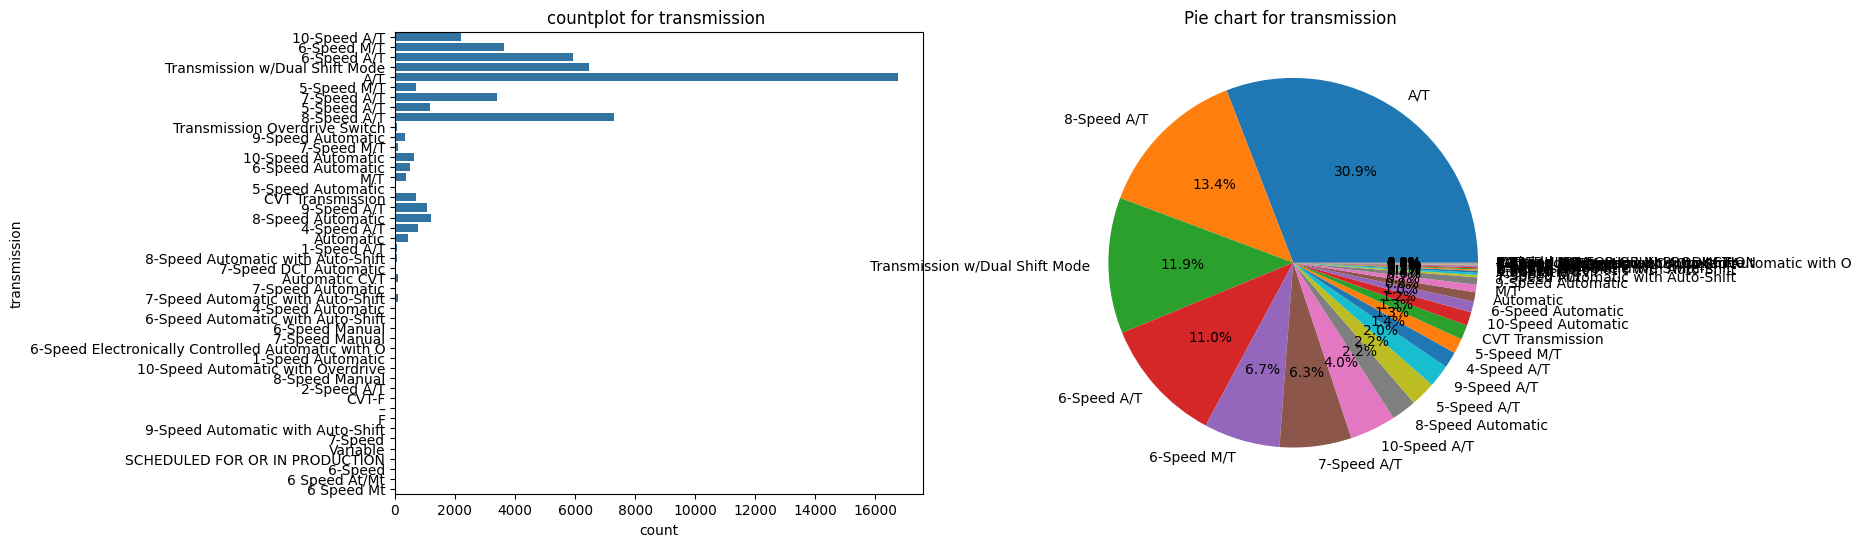

**************************************************
distributions for category fuel_type is 
 fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
–                   294
Plug-In Hybrid      182
not supported         4
Name: count, dtype: int64


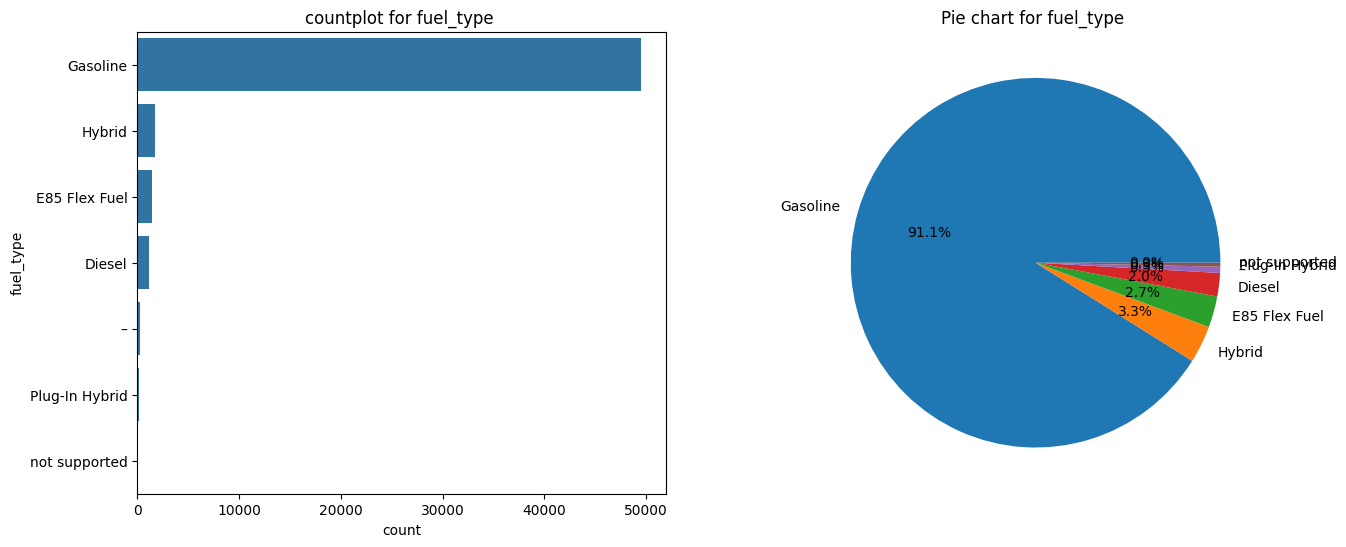

**************************************************
distributions for category ext_col is 
 ext_col
Black                      15078
White                      13422
Gray                        7909
Silver                      5161
Blue                        4668
                           ...  
Balloon White                  1
Firenze Red Metallic           1
Orca Black Metallic            1
Radiant Red Metallic II        1
Magnetic Gray Clearcoat        1
Name: count, Length: 260, dtype: int64


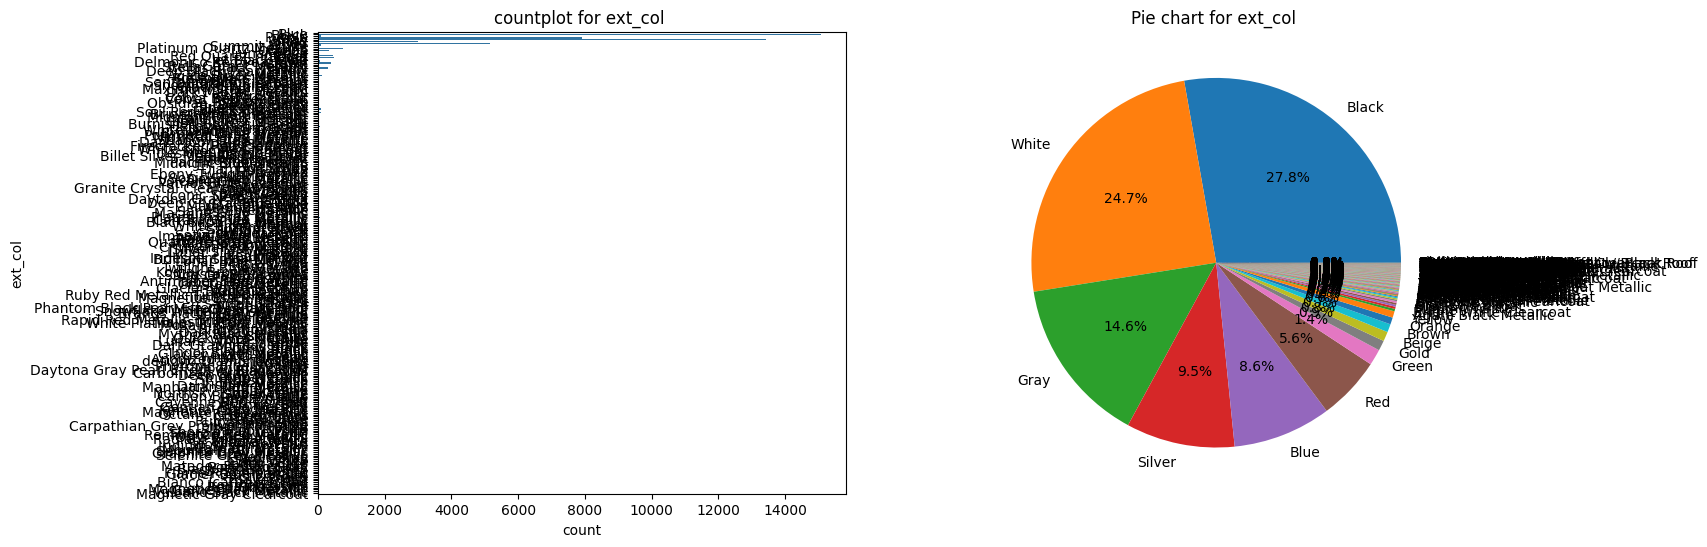

In [ ]:
for col in categorical_col_1:   #looping for each column in categorical column
    print("*"*50)
    print("distributions for category {} is \n" .format(col),data[col].value_counts())  #value distribution for each category
    plt.figure(figsize=[15,6])  #figure size
    plt.subplot(1,2,1)  #subplot 1
    sns.countplot(data,y=col)   #countplot for all columns
    plt.title("countplot for {} ".format(col))

    plt.subplot(1,2,2)  #subplot 2
    mylabels=data[col].value_counts().index #labeles for pie chart
    y=data[col].value_counts().values   #values for each label in pie chart
    plt.pie(y,labels=mylabels,autopct="%1.1f%%")    #ploting pie chart
    plt.title("Pie chart for {} ".format(col))
    plt.show(); #to remove arrays in output

- Price vs fuel type

<Axes: xlabel='fuel_type', ylabel='price'>

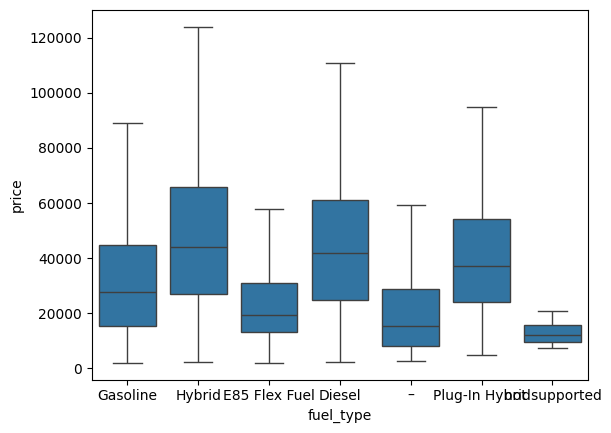

In [ ]:
#price comparision with each fuel type models
sns.boxplot(x ="fuel_type", y ="price",data =data, showfliers=False)

## Feature encoding and Data pre-processing

- Preparing train and test data

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
#from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Reusing the preprocess_data function to fit and transform only X_train
def preprocess_data(df, preprocessor=None, is_train=True):
    # Handling missing values
    df.fillna({
        'brand': df['brand'].mode()[0],
        'model': df['model'].mode()[0],
        'model_year': df['model_year'].mean(),
        'milage': df['milage'].mean(),
        'engine': df['engine'].mode()[0],
        'transmission': df['transmission'].mode()[0],
        'ext_col': df['ext_col'].mode()[0],
        'int_col': df['int_col'].mode()[0],
        'accident': df['accident'].mode()[0],
        'clean_title': df['clean_title'].mode()[0],
    }, inplace=True)

    # Feature creation
    df['age'] = 2024 - df['model_year']
    df['engine_displacement'] = df['engine'].str.extract('(\d+\.\d+)L').astype(float)
    df['power_hp'] = df['engine'].str.extract('(\d+\.\d+)HP').astype(float)
    df['milage_per_year'] = df['milage'] / df['age']

    # Dropping irrelevant or transformed columns
    df.drop(columns=['engine', 'model_year'], inplace=True)

    # Handling infinite values after feature creation
    df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    df.fillna({
        'engine_displacement': df['engine_displacement'].mean(),
        'power_hp': df['power_hp'].mean(),
        'milage_per_year': df['milage_per_year'].mean()
    }, inplace=True)

    # If training, separate features and target variable
    if is_train:
        X = df.drop(columns=['price'])
        y = df['price']
    else:
        X = df

    # Handling categorical variables
    categorical_features = X.select_dtypes(include=['object']).columns
    numeric_features = X.select_dtypes(exclude=['object']).columns

    # Creating preprocessing pipelines for both numeric and categorical data
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    if preprocessor is None:
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ])
        X_preprocessed = preprocessor.fit_transform(X)
    else:
        X_preprocessed = preprocessor.transform(X)

    if is_train:
        return X_preprocessed, y, preprocessor
    else:
        return X_preprocessed




In [ ]:
# Example usage for training data
train_path = 'train.csv'
train_df = pd.read_csv(train_path)
train_df.drop(["id"],axis=1,inplace=True)
X, y, preprocessor = preprocess_data(train_df, is_train=True)


In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Example usage for test data
test_path = 'test.csv'
test_df = pd.read_csv(test_path)
test_df.drop(["id"],axis=1,inplace=True)
X_test = preprocess_data(test_df, preprocessor=preprocessor, is_train=False)

### Importing all regression model

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.1 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LinearRegression   #importing linearregression model
from sklearn.linear_model import Ridge  #importing Ridge
from sklearn.linear_model import Lasso  #importing Lasso
from sklearn.linear_model import ElasticNet #importing Elasticnet
from sklearn.svm import SVR #importing svr
from sklearn.ensemble import RandomForestRegressor #importing Random_forest
from sklearn.tree import DecisionTreeRegressor #importing Decision tree
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

In [ ]:
r2_score_list_val=[]    #list to store r2 score of val data for all model
r2_score_list_train=[]  #list to store r2 score of train data for all model
mean_sqr_error_val=[]   #list to store mean squared error of val data for all model
mean_sqr_error_train=[] #list to store mean squared error of train data for all model
r_mean_sqr_error_train=[]
r_mean_sqr_error_val=[]


In [ ]:
#model list
model_list=[Ridge(), CatBoostRegressor()]


In [ ]:
for model in model_list:    #looping each model
    model.fit(X_train,y_train)  #training to each model with training data
    test_prediction=model.predict(X_test)  #prediction on test data
    val_prediction=model.predict(X_val)  #prediction on val data
    train_prediction=model.predict(X_train) #prediction on train data

    # R-squared and Mean Squared Error for Training Data
    r2_train = r2_score(y_train, train_prediction)
    mse_train = mean_squared_error(y_train, train_prediction)
    rmse_train = np.sqrt(mse_train)
    r2_score_list_train.append(r2_train)
    mean_sqr_error_train.append(mse_train)
    r_mean_sqr_error_train.append(rmse_train)

    # R-squared and Mean Squared Error for Validation Data
    r2_val = r2_score(y_val, val_prediction)
    mse_val = mean_squared_error(y_val, val_prediction)
    rmse_val = np.sqrt(mse_val)
    r2_score_list_val.append(r2_val)
    mean_sqr_error_val.append(mse_val)
    r_mean_sqr_error_val.append(rmse_val)

Learning rate set to 0.07429
0:	learn: 76204.9342509	total: 62ms	remaining: 1m 1s
1:	learn: 75702.2535246	total: 76.1ms	remaining: 38s
2:	learn: 75285.3075525	total: 91.8ms	remaining: 30.5s
3:	learn: 74893.7018293	total: 105ms	remaining: 26.1s
4:	learn: 74565.6430563	total: 118ms	remaining: 23.5s
5:	learn: 74246.6934563	total: 131ms	remaining: 21.6s
6:	learn: 73912.8556501	total: 144ms	remaining: 20.4s
7:	learn: 73638.3532455	total: 157ms	remaining: 19.4s
8:	learn: 73372.9827124	total: 170ms	remaining: 18.7s
9:	learn: 73129.8414798	total: 183ms	remaining: 18.2s
10:	learn: 72920.4852662	total: 197ms	remaining: 17.7s
11:	learn: 72794.0775570	total: 209ms	remaining: 17.2s
12:	learn: 72579.4734293	total: 222ms	remaining: 16.9s
13:	learn: 72418.2217633	total: 242ms	remaining: 17s
14:	learn: 72300.7692351	total: 271ms	remaining: 17.8s
15:	learn: 72194.6856910	total: 297ms	remaining: 18.2s
16:	learn: 72007.5029964	total: 331ms	remaining: 19.1s
17:	learn: 71976.4387891	total: 358ms	remaining: 

In [ ]:
# Print results for verification
print("R-squared for Training Data: ", r2_score_list_train)
print("Mean Squared Error for Training Data: ", mean_sqr_error_train)
print("Root Mean Squared Error for Training Data: ", r_mean_sqr_error_train)

print("R-squared for Validation Data: ", r2_score_list_val)
print("Mean Squared Error for Validation Data: ", mean_sqr_error_val)
print("Root Mean Squared Error for Validation Data: ", r_mean_sqr_error_val)


R-squared for Training Data:  [0.173845639474135, 0.703872288715107]
Mean Squared Error for Training Data:  [4870024598.023469, 1745617171.5850554]
Root Mean Squared Error for Training Data:  [69785.56152975677, 41780.58366735744]
R-squared for Validation Data:  [0.16300479695379377, 0.1754681721302045]
Mean Squared Error for Validation Data:  [2459510881.391392, 2422887246.3291097]
Root Mean Squared Error for Validation Data:  [49593.45603395061, 49222.832571166706]


- KPI

In [ ]:
import math
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error #importing performance metrics

In [ ]:
#model list
#model_list=[LinearRegression(),
#               Ridge(),
#               Lasso(),
#               ElasticNet(),
#            SVR(kernel='linear'),
#            RandomForestRegressor(),
#            DecisionTreeRegressor(),
#            KNeighborsRegressor(),
#            CatBoostRegressor()]


In [ ]:
#DataFrame to store r2_score of all the models
r2_score_df=pd.DataFrame({"model":model_list,
                                "r2_score_train":r2_train,
                                "r2_score_val":r2_val})

In [ ]:
#DataFrame to store MSE of all the models
mse_score_df=pd.DataFrame({"model":model_list,
                                "mean_squared_error_train":mse_train,
                                "mean_squared_error_val":mse_val})

In [ ]:
#DataFrame to store RMSE of all the models
r_mse_score_df=pd.DataFrame({"model":model_list,
                                "r_mean_squared_error_train":rmse_train,
                                "r_mean_squared_error_val":rmse_val})

In [ ]:
r2_score_df

,model,r2_score_train,r2_score_val
0,Ridge(),0.703872,0.175468
1,<catboost.core.CatBoostRegressor object at 0x7...,0.703872,0.175468


In [ ]:
mse_score_df

,model,mean_squared_error_train,mean_squared_error_val
0,Ridge(),1.745617e+09,2.422887e+09
1,<catboost.core.CatBoostRegressor object at 0x7...,1.745617e+09,2.422887e+09


In [ ]:
r_mse_score_df

,model,r_mean_squared_error_train,r_mean_squared_error_val
0,Ridge(),41780.583667,49222.832571
1,<catboost.core.CatBoostRegressor object at 0x7...,41780.583667,49222.832571


### Observation

In [ ]:
# Predictions for the test data are made, but no evaluation since y_test is not available
#test_predictions = [model.predict(X_test) for model in model_list]
#vertical_predictions = [value for prediction in test_predictions for value in prediction]

#print("Predictions for Test Data: ", ver_predictions)
#header = ["id", "price"]
#test_index = pd.read_csv(test_path)
#submission_df = pd.DataFrame(data={"id": test_index['id'], "price": vertical_predictions}, columns=header)
#submission_df.to_csv("submission1.csv", index=False)

In [ ]:
#submission_df.to_csv("submission5.csv", index=False)

In [ ]:
r2_score_list_train

[0.173845639474135, 0.703872288715107]